In [102]:

############# PREDICTING US ELECTIONS WITH MACHINE LEARNING/DEEP LEARNING #####################################################
#
# In this project I am using publically available data on the 2016 US Election to see how well the outcome could have been 
# predicted at a county level. I will use a number of models, increasing in complexity, from K-Nearest Neighbor to a Tensorflow
# Neural network, to see which approach is best. Results and analysis are at the bottom of the notebook  
#                                                                                   - Project by Adam Szczepanski
###############################################################################################################################

import pandas as pd
import numpy as np
import sklearn
import os
import tensorflow as tf
import xgboost as xgb
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from xgboost import plot_importance

#versions
print('Pandas Version: {}'.format(pd.__version__))
print('Numpy Version: {}'.format(np.__version__))
print('Sci-Kit Learn Version: {}'.format(sklearn.__version__))
print('Tensorflow Learn Version: {}'.format(tf.__version__))


#visualization
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

Pandas Version: 1.4.3
Numpy Version: 1.22.4
Sci-Kit Learn Version: 1.1.1
Tensorflow Learn Version: 2.11.0


In [103]:
#finding the current working directory
cwd = os.getcwd()
print(cwd)


file  = pd.read_csv(r'C:\Users\Owner\Desktop\Winpython 3.10\WPy64-31050\notebooks\Machine Learning\TensorFlow 2.0\2016 Aggregated Data.csv')


df = pd.DataFrame(file)

#print(df['fips'])

print(df.head())
print('\n')

print('Column Names:\n {}\n'.format(list(df)))
print('Info: {}\n'.format(df.info()))

print(list(df))
print('\n')


print(df.info())
print('\n')


# Check is there are any Nan in data
print("Any NaN Values in Dataset?")
print(np.any(np.isnan(df)))

print('\n')
print(df.describe())
print('\n')



C:\Users\Owner\Desktop\Winpython 3.10\WPy64-31050\notebooks\Machine Learning\TensorFlow 2.0
   fips  winner  population_change  pop010210  age135214  age295214  \
0  1001       0                1.5      54571        6.0       25.2   
1  1003       0                9.8     182265        5.6       22.2   
2  1005       0               -2.1      27457        5.7       21.2   
3  1007       0               -1.8      22915        5.3       21.0   
4  1009       0                0.7      57322        6.1       23.6   

   age65plus  sex255214  pop715213  pop645213  ...  sbo415207  sbo015207  \
0       13.8       51.4       85.0        1.6  ...        0.7       31.7   
1       18.7       51.2       82.1        3.6  ...        1.3       27.3   
2       16.5       46.6       84.8        2.9  ...        0.0       27.0   
3       14.8       45.9       86.6        1.2  ...        0.0        0.0   
4       17.0       50.5       88.7        4.3  ...        0.0       23.2   

   man450207  wtn220207 

In [104]:
# Dictionary conversion for Columns

file2  = pd.read_csv(r'C:\Users\Owner\Desktop\Winpython 3.10\WPy64-31050\notebooks\Machine Learning\TensorFlow 2.0\Dictionary for Columns - Election 2016.csv')

index_columns = pd.DataFrame(file2)

print(index_columns.head(44))


   column_name                                        description
0    PST045214                          Population, 2014 estimate
1    PST040210          Population, 2010 (April 1) estimates base
2    PST120214  Population, percent change - April 1, 2010 to ...
3    POP010210                                   Population, 2010
4    AGE135214               Persons under 5 years, percent, 2014
5    AGE295214              Persons under 18 years, percent, 2014
6    AGE775214           Persons 65 years and over, percent, 2014
7    SEX255214                      Female persons, percent, 2014
8    POP715213  Living in same house 1 year & over, percent, 2...
9    POP645213           Foreign born persons, percent, 2009-2013
10   POP815213  Language other than English spoken at home, pc...
11   EDU635213  High school graduate or higher, percent of per...
12   EDU685213  Bachelor's degree or higher, percent of person...
13   VET605213                                Veterans, 2009-2013
14   LFE30

array([[<AxesSubplot:title={'center':'winner'}>]], dtype=object)

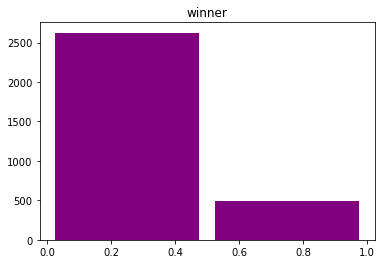

In [105]:

# We see that the dataset is imbalanced, there are many more entries for "Republican" than "Democrat". This will influence
# how the results are analyzed at the end of this project.
df.hist(column='winner', bins=2, grid=False, rwidth=.9, color='purple')


In [106]:
#### Splitting the Dataset to training and test sets ####

print(df['winner'].head())

# Separating the target variable: [0 = Republican], [1 = Democrat]
y = df['winner']

#Checking to see output looks correct and only 'winner' column is isolated 
print(y.head(7))

# Removing 'winner' column from dataset
df.drop('winner',axis=1, inplace=True) 

df = df.reset_index()
del df['index']


# Splitting the data into train and test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, random_state = 0)

# Confirming that the target ( variable 'y' /'winner') is removed from train and test splits in order to not influence result
# by giving the model the target output which would result in a 100% accuracy for all models.
print('\n')
print(X_train.info())
print(X_test.info())


0    0
1    0
2    0
3    0
4    0
Name: winner, dtype: int64
0    0
1    0
2    0
3    0
4    0
5    1
6    0
Name: winner, dtype: int64


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2334 entries, 37 to 2732
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fips               2334 non-null   int64  
 1   population_change  2334 non-null   float64
 2   pop010210          2334 non-null   int64  
 3   age135214          2334 non-null   float64
 4   age295214          2334 non-null   float64
 5   age65plus          2334 non-null   float64
 6   sex255214          2334 non-null   float64
 7   pop715213          2334 non-null   float64
 8   pop645213          2334 non-null   float64
 9   nonenglish         2334 non-null   float64
 10  edu_highschool     2334 non-null   float64
 11  edu_batchelors     2334 non-null   float64
 12  vet605213          2334 non-null   int64  
 13  lfe305213          2334 non

In [107]:
########## PIPELINES ###########

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier



#Building the Pipeline

# The pipelines setting the seed/random state for a random number generator, to get the same results in every run.
pipe_knn = Pipeline([('preprocessing', StandardScaler()),('classifier', KNeighborsClassifier())])
pipe_rf = Pipeline([('classifier', RandomForestClassifier(random_state=42))])
pipe_xgboost = Pipeline([('classifier', XGBClassifier(objective= 'binary:logistic',seed=42))])



### Parameter Grids for the machine learning classifiers to be used (Neural Network in Tensorflow addressed seperately below)

# KNN - using KNN as a simple model to see how well a simple algorithm will generalize to new data.
param_grid_knn = [{
    'classifier': [KNeighborsClassifier()], 
                
    'preprocessing': [StandardScaler(), None],
                
    'classifier__n_neighbors': [1, 3, 5 ]}]


# Random Forest Classifier:
param_grid_rf = [{
    'classifier': [RandomForestClassifier(n_jobs =3)],
               
    'classifier__max_features':[3,5,7],
               
    'classifier__n_estimators': [50, 100, 200],
               
    'classifier__max_depth': [3,5,7,9]}]


# XGBoost Classifier - Gradient boosted decision tree
param_grid_xgboost = [{
    'classifier__max_depth': range (2, 10, 1),
    'classifier__n_estimators': range(60, 220, 40),
    'classifier__learning_rate': [0.1, 0.01, 0.05]
}]


# Grid Search with a Cross-Validation fold of 5 
gs_knn = GridSearchCV(pipe_knn, param_grid_knn, cv=5)

gs_rf = GridSearchCV(pipe_rf, param_grid_rf, cv=5)

gs_xgboost = GridSearchCV(pipe_xgboost, param_grid_xgboost, cv=5)


In [108]:

#List of Grid searches for easier iteration
grids = [gs_knn, gs_rf, gs_xgboost]


for gs in grids:
    # Fit grid search 
    gs.fit(X_train, y_train)
    # Best Parameters:
    print('\nBest Parameters: %s\n' % gs.best_params_)
    # Training Set Score:
    print("Training set Score: {}".format(gs.score(X_train, y_train)))
    # Best Score:
    print('Best Accuracy: %s' % gs.best_score_)
    #Predictions:
    y_pred = gs.predict(X_test)
    # Best Scores:
    print('Best Scores: %s\n' % accuracy_score(y_test,y_pred))
    
    # Confusion Matrix for each estimator:
    confusion = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:\n{}\n'.format(confusion))
    
    # Classification Reports:
    print(classification_report(y_test,y_pred, target_names =['Republican','Democrat'] ))
    print('\n'*4)



Best Parameters: {'classifier': KNeighborsClassifier(), 'classifier__n_neighbors': 5, 'preprocessing': StandardScaler()}

Training set Score: 0.9357326478149101
Best Accuracy: 0.9117405409379566
Best Scores: 0.903598971722365

Confusion Matrix:
[[642   9]
 [ 66  61]]

              precision    recall  f1-score   support

  Republican       0.91      0.99      0.94       651
    Democrat       0.87      0.48      0.62       127

    accuracy                           0.90       778
   macro avg       0.89      0.73      0.78       778
weighted avg       0.90      0.90      0.89       778







Best Parameters: {'classifier': RandomForestClassifier(max_depth=9, max_features=7, n_jobs=3), 'classifier__max_depth': 9, 'classifier__max_features': 7, 'classifier__n_estimators': 100}

Training set Score: 0.9730077120822622
Best Accuracy: 0.9228827967760612
Best Scores: 0.916452442159383

Confusion Matrix:
[[639  12]
 [ 53  74]]

              precision    recall  f1-score   support

  Repub

In [109]:

from tensorflow.keras import callbacks

filepath=str(os.getcwd()+"/US Election Outcome model.h5f")

# ReduceLROnPlateau - will reduce the learning rate by a factor of 0.2 when the validation loss doesn't decrease after 2 epochs.
#                     cooldown means that the model will run two epochs at the reduced learning rate before going back to 
#                     original learning rate.
# Model Checkpoint - saves the best model
callbacks = [tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                     factor = 0.2,
                                                     patience = 2,
                                                      cooldown=2),
                    tf.keras.callbacks.ModelCheckpoint(filepath=filepath,
                                                     monitor='val_accuracy',
                                                    verbose=1,
                                                     save_best_only=True,
                                                    mode='max')]


In [110]:
#       ****** TENSORFLOW NEURAL NETWORK ******

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler


#  ****Data scaling before feeding into Neural Network*** 

# Using MinMaxScaler because it scales and translates each feature individually such that it is in 
# the given range on the training set, e.g. between zero and one.
scaler = MinMaxScaler()

#fitting the scaling to the training set.
scaler.fit(X_train)

#Tranforming the scaled data to training data.
X_train_scaled = scaler.transform(X_train)

#transforming the test set to the same scaling as the training set.
X_test_scaled = scaler.transform(X_test)



#for a binary classification I will be using a final dense network of 1, with a sigmoid activation.
model = Sequential([
    Dense(64, activation="relu"),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(1, activation='sigmoid')
]);



#Using 'binary_crossentropy' as the loss function because targets are a binary "Republican" or "Democrat".
model.compile(
    optimizer='rmsprop', 
    loss='binary_crossentropy', 
    metrics=['accuracy']
)


history = model.fit(X_train_scaled, y_train,
                  epochs = 20, batch_size = 128,
                  callbacks=callbacks,
                  validation_data = (X_test_scaled, y_test))


# Summary of the model:
print(model.summary())



Epoch 1/20
 1/19 [>.............................] - ETA: 9s - loss: 0.7200 - accuracy: 0.1406
Epoch 1: val_accuracy improved from -inf to 0.83933, saving model to C:\Users\Owner\Desktop\Winpython 3.10\WPy64-31050\notebooks\Machine Learning\TensorFlow 2.0\US Election Outcome model.h5f


INFO:tensorflow:Assets written to: C:\Users\Owner\Desktop\Winpython 3.10\WPy64-31050\notebooks\Machine Learning\TensorFlow 2.0\US Election Outcome model.h5f\assets


INFO:tensorflow:Assets written to: C:\Users\Owner\Desktop\Winpython 3.10\WPy64-31050\notebooks\Machine Learning\TensorFlow 2.0\US Election Outcome model.h5f\assets


19/19 [==============================] - 1s 43ms/step - loss: 0.5140 - accuracy: 0.8072 - val_loss: 0.4183 - val_accuracy: 0.8393 - lr: 0.0010
Epoch 2/20
 1/19 [>.............................] - ETA: 0s - loss: 0.3952 - accuracy: 0.8516
Epoch 2: val_accuracy improved from 0.83933 to 0.85733, saving model to C:\Users\Owner\Desktop\Winpython 3.10\WPy64-31050\notebooks\Machine Learning\TensorFlow 2.0\US Election Outcome model.h5f


INFO:tensorflow:Assets written to: C:\Users\Owner\Desktop\Winpython 3.10\WPy64-31050\notebooks\Machine Learning\TensorFlow 2.0\US Election Outcome model.h5f\assets


INFO:tensorflow:Assets written to: C:\Users\Owner\Desktop\Winpython 3.10\WPy64-31050\notebooks\Machine Learning\TensorFlow 2.0\US Election Outcome model.h5f\assets


19/19 [==============================] - 1s 34ms/step - loss: 0.3688 - accuracy: 0.8509 - val_loss: 0.3474 - val_accuracy: 0.8573 - lr: 0.0010
Epoch 3/20
 1/19 [>.............................] - ETA: 0s - loss: 0.2688 - accuracy: 0.8906
Epoch 3: val_accuracy improved from 0.85733 to 0.88817, saving model to C:\Users\Owner\Desktop\Winpython 3.10\WPy64-31050\notebooks\Machine Learning\TensorFlow 2.0\US Election Outcome model.h5f


INFO:tensorflow:Assets written to: C:\Users\Owner\Desktop\Winpython 3.10\WPy64-31050\notebooks\Machine Learning\TensorFlow 2.0\US Election Outcome model.h5f\assets


INFO:tensorflow:Assets written to: C:\Users\Owner\Desktop\Winpython 3.10\WPy64-31050\notebooks\Machine Learning\TensorFlow 2.0\US Election Outcome model.h5f\assets


19/19 [==============================] - 1s 44ms/step - loss: 0.3134 - accuracy: 0.8775 - val_loss: 0.3144 - val_accuracy: 0.8882 - lr: 0.0010
Epoch 4/20
 1/19 [>.............................] - ETA: 0s - loss: 0.2992 - accuracy: 0.8984
Epoch 4: val_accuracy improved from 0.88817 to 0.89075, saving model to C:\Users\Owner\Desktop\Winpython 3.10\WPy64-31050\notebooks\Machine Learning\TensorFlow 2.0\US Election Outcome model.h5f


INFO:tensorflow:Assets written to: C:\Users\Owner\Desktop\Winpython 3.10\WPy64-31050\notebooks\Machine Learning\TensorFlow 2.0\US Election Outcome model.h5f\assets


INFO:tensorflow:Assets written to: C:\Users\Owner\Desktop\Winpython 3.10\WPy64-31050\notebooks\Machine Learning\TensorFlow 2.0\US Election Outcome model.h5f\assets


19/19 [==============================] - 1s 36ms/step - loss: 0.2805 - accuracy: 0.8907 - val_loss: 0.2974 - val_accuracy: 0.8907 - lr: 0.0010
Epoch 5/20
 1/19 [>.............................] - ETA: 0s - loss: 0.3037 - accuracy: 0.8828
Epoch 5: val_accuracy improved from 0.89075 to 0.89589, saving model to C:\Users\Owner\Desktop\Winpython 3.10\WPy64-31050\notebooks\Machine Learning\TensorFlow 2.0\US Election Outcome model.h5f


INFO:tensorflow:Assets written to: C:\Users\Owner\Desktop\Winpython 3.10\WPy64-31050\notebooks\Machine Learning\TensorFlow 2.0\US Election Outcome model.h5f\assets


INFO:tensorflow:Assets written to: C:\Users\Owner\Desktop\Winpython 3.10\WPy64-31050\notebooks\Machine Learning\TensorFlow 2.0\US Election Outcome model.h5f\assets


19/19 [==============================] - 1s 36ms/step - loss: 0.2645 - accuracy: 0.9010 - val_loss: 0.2761 - val_accuracy: 0.8959 - lr: 0.0010
Epoch 6/20
 1/19 [>.............................] - ETA: 0s - loss: 0.3294 - accuracy: 0.8984
Epoch 6: val_accuracy did not improve from 0.89589
19/19 [==============================] - 0s 4ms/step - loss: 0.2535 - accuracy: 0.9027 - val_loss: 0.3197 - val_accuracy: 0.8779 - lr: 0.0010
Epoch 7/20
 1/19 [>.............................] - ETA: 0s - loss: 0.3159 - accuracy: 0.8828
Epoch 7: val_accuracy improved from 0.89589 to 0.89974, saving model to C:\Users\Owner\Desktop\Winpython 3.10\WPy64-31050\notebooks\Machine Learning\TensorFlow 2.0\US Election Outcome model.h5f


INFO:tensorflow:Assets written to: C:\Users\Owner\Desktop\Winpython 3.10\WPy64-31050\notebooks\Machine Learning\TensorFlow 2.0\US Election Outcome model.h5f\assets


INFO:tensorflow:Assets written to: C:\Users\Owner\Desktop\Winpython 3.10\WPy64-31050\notebooks\Machine Learning\TensorFlow 2.0\US Election Outcome model.h5f\assets


19/19 [==============================] - 1s 37ms/step - loss: 0.2443 - accuracy: 0.9057 - val_loss: 0.2652 - val_accuracy: 0.8997 - lr: 0.0010
Epoch 8/20
 1/19 [>.............................] - ETA: 0s - loss: 0.3044 - accuracy: 0.8672
Epoch 8: val_accuracy improved from 0.89974 to 0.90360, saving model to C:\Users\Owner\Desktop\Winpython 3.10\WPy64-31050\notebooks\Machine Learning\TensorFlow 2.0\US Election Outcome model.h5f


INFO:tensorflow:Assets written to: C:\Users\Owner\Desktop\Winpython 3.10\WPy64-31050\notebooks\Machine Learning\TensorFlow 2.0\US Election Outcome model.h5f\assets


INFO:tensorflow:Assets written to: C:\Users\Owner\Desktop\Winpython 3.10\WPy64-31050\notebooks\Machine Learning\TensorFlow 2.0\US Election Outcome model.h5f\assets


19/19 [==============================] - 1s 40ms/step - loss: 0.2367 - accuracy: 0.9062 - val_loss: 0.2488 - val_accuracy: 0.9036 - lr: 0.0010
Epoch 9/20
 1/19 [>.............................] - ETA: 0s - loss: 0.1956 - accuracy: 0.9297
Epoch 9: val_accuracy did not improve from 0.90360
19/19 [==============================] - 0s 4ms/step - loss: 0.2266 - accuracy: 0.9100 - val_loss: 0.2586 - val_accuracy: 0.9023 - lr: 0.0010
Epoch 10/20
 1/19 [>.............................] - ETA: 0s - loss: 0.2471 - accuracy: 0.8828
Epoch 10: val_accuracy improved from 0.90360 to 0.90874, saving model to C:\Users\Owner\Desktop\Winpython 3.10\WPy64-31050\notebooks\Machine Learning\TensorFlow 2.0\US Election Outcome model.h5f


INFO:tensorflow:Assets written to: C:\Users\Owner\Desktop\Winpython 3.10\WPy64-31050\notebooks\Machine Learning\TensorFlow 2.0\US Election Outcome model.h5f\assets


INFO:tensorflow:Assets written to: C:\Users\Owner\Desktop\Winpython 3.10\WPy64-31050\notebooks\Machine Learning\TensorFlow 2.0\US Election Outcome model.h5f\assets


19/19 [==============================] - 1s 49ms/step - loss: 0.2212 - accuracy: 0.9160 - val_loss: 0.2366 - val_accuracy: 0.9087 - lr: 0.0010
Epoch 11/20
 1/19 [>.............................] - ETA: 0s - loss: 0.2573 - accuracy: 0.8906
Epoch 11: val_accuracy improved from 0.90874 to 0.91003, saving model to C:\Users\Owner\Desktop\Winpython 3.10\WPy64-31050\notebooks\Machine Learning\TensorFlow 2.0\US Election Outcome model.h5f


INFO:tensorflow:Assets written to: C:\Users\Owner\Desktop\Winpython 3.10\WPy64-31050\notebooks\Machine Learning\TensorFlow 2.0\US Election Outcome model.h5f\assets


INFO:tensorflow:Assets written to: C:\Users\Owner\Desktop\Winpython 3.10\WPy64-31050\notebooks\Machine Learning\TensorFlow 2.0\US Election Outcome model.h5f\assets


19/19 [==============================] - 1s 34ms/step - loss: 0.2147 - accuracy: 0.9113 - val_loss: 0.2299 - val_accuracy: 0.9100 - lr: 0.0010
Epoch 12/20
 1/19 [>.............................] - ETA: 0s - loss: 0.1915 - accuracy: 0.9297
Epoch 12: val_accuracy did not improve from 0.91003
19/19 [==============================] - 0s 3ms/step - loss: 0.2117 - accuracy: 0.9160 - val_loss: 0.3099 - val_accuracy: 0.8805 - lr: 0.0010
Epoch 13/20
 1/19 [>.............................] - ETA: 0s - loss: 0.2905 - accuracy: 0.8828
Epoch 13: val_accuracy did not improve from 0.91003
19/19 [==============================] - 0s 3ms/step - loss: 0.2089 - accuracy: 0.9190 - val_loss: 0.2458 - val_accuracy: 0.8972 - lr: 0.0010
Epoch 14/20
 1/19 [>.............................] - ETA: 0s - loss: 0.1787 - accuracy: 0.9141
Epoch 14: val_accuracy improved from 0.91003 to 0.91131, saving model to C:\Users\Owner\Desktop\Winpython 3.10\WPy64-31050\notebooks\Machine Learning\TensorFlow 2.0\US Election Outcome

INFO:tensorflow:Assets written to: C:\Users\Owner\Desktop\Winpython 3.10\WPy64-31050\notebooks\Machine Learning\TensorFlow 2.0\US Election Outcome model.h5f\assets


INFO:tensorflow:Assets written to: C:\Users\Owner\Desktop\Winpython 3.10\WPy64-31050\notebooks\Machine Learning\TensorFlow 2.0\US Election Outcome model.h5f\assets


19/19 [==============================] - 1s 35ms/step - loss: 0.1989 - accuracy: 0.9182 - val_loss: 0.2275 - val_accuracy: 0.9113 - lr: 2.0000e-04
Epoch 15/20
 1/19 [>.............................] - ETA: 0s - loss: 0.2035 - accuracy: 0.9375
Epoch 15: val_accuracy improved from 0.91131 to 0.91774, saving model to C:\Users\Owner\Desktop\Winpython 3.10\WPy64-31050\notebooks\Machine Learning\TensorFlow 2.0\US Election Outcome model.h5f


INFO:tensorflow:Assets written to: C:\Users\Owner\Desktop\Winpython 3.10\WPy64-31050\notebooks\Machine Learning\TensorFlow 2.0\US Election Outcome model.h5f\assets


INFO:tensorflow:Assets written to: C:\Users\Owner\Desktop\Winpython 3.10\WPy64-31050\notebooks\Machine Learning\TensorFlow 2.0\US Election Outcome model.h5f\assets


19/19 [==============================] - 1s 40ms/step - loss: 0.1980 - accuracy: 0.9216 - val_loss: 0.2202 - val_accuracy: 0.9177 - lr: 2.0000e-04
Epoch 16/20
 1/19 [>.............................] - ETA: 0s - loss: 0.2231 - accuracy: 0.9141
Epoch 16: val_accuracy did not improve from 0.91774
19/19 [==============================] - 0s 4ms/step - loss: 0.1959 - accuracy: 0.9199 - val_loss: 0.2222 - val_accuracy: 0.9139 - lr: 2.0000e-04
Epoch 17/20
 1/19 [>.............................] - ETA: 0s - loss: 0.1414 - accuracy: 0.9453
Epoch 17: val_accuracy improved from 0.91774 to 0.91902, saving model to C:\Users\Owner\Desktop\Winpython 3.10\WPy64-31050\notebooks\Machine Learning\TensorFlow 2.0\US Election Outcome model.h5f


INFO:tensorflow:Assets written to: C:\Users\Owner\Desktop\Winpython 3.10\WPy64-31050\notebooks\Machine Learning\TensorFlow 2.0\US Election Outcome model.h5f\assets


INFO:tensorflow:Assets written to: C:\Users\Owner\Desktop\Winpython 3.10\WPy64-31050\notebooks\Machine Learning\TensorFlow 2.0\US Election Outcome model.h5f\assets


19/19 [==============================] - 1s 37ms/step - loss: 0.1953 - accuracy: 0.9207 - val_loss: 0.2193 - val_accuracy: 0.9190 - lr: 2.0000e-04
Epoch 18/20
 1/19 [>.............................] - ETA: 0s - loss: 0.2040 - accuracy: 0.9062
Epoch 18: val_accuracy did not improve from 0.91902
19/19 [==============================] - 0s 3ms/step - loss: 0.1951 - accuracy: 0.9199 - val_loss: 0.2246 - val_accuracy: 0.9139 - lr: 2.0000e-04
Epoch 19/20
 1/19 [>.............................] - ETA: 0s - loss: 0.1162 - accuracy: 0.9453
Epoch 19: val_accuracy improved from 0.91902 to 0.92031, saving model to C:\Users\Owner\Desktop\Winpython 3.10\WPy64-31050\notebooks\Machine Learning\TensorFlow 2.0\US Election Outcome model.h5f


INFO:tensorflow:Assets written to: C:\Users\Owner\Desktop\Winpython 3.10\WPy64-31050\notebooks\Machine Learning\TensorFlow 2.0\US Election Outcome model.h5f\assets


INFO:tensorflow:Assets written to: C:\Users\Owner\Desktop\Winpython 3.10\WPy64-31050\notebooks\Machine Learning\TensorFlow 2.0\US Election Outcome model.h5f\assets


19/19 [==============================] - 1s 34ms/step - loss: 0.1947 - accuracy: 0.9229 - val_loss: 0.2175 - val_accuracy: 0.9203 - lr: 2.0000e-04
Epoch 20/20
 1/19 [>.............................] - ETA: 0s - loss: 0.2217 - accuracy: 0.8984
Epoch 20: val_accuracy did not improve from 0.92031
19/19 [==============================] - 0s 3ms/step - loss: 0.1942 - accuracy: 0.9233 - val_loss: 0.2196 - val_accuracy: 0.9177 - lr: 2.0000e-04
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                2752      
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 

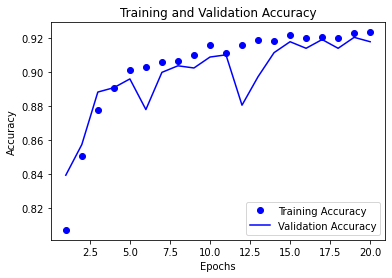

In [111]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs,val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# This model does not display much overfitting and appears to generalize well to the test/validation set. In a case of
# overfitting we would expect to see the lines of training and validation accuracy to diverge(with training accuracy approaching
# 100%, rather than follow a similar path.


In [112]:

#page 292/293

y_pred_nn = model.predict(X_test_scaled)
confusion_matrix_neural_network = sklearn.metrics.confusion_matrix(y_test, np.rint(y_pred_nn))
print('Confusion Matrix of Neural Network:\n{}\n'.format(confusion_matrix_neural_network))


# For Tensorflow neural networks, a final dense layer with a 'sigmoid' activation is best for binary classification models.
# This outputs a continuous number which is incompatible with the Classification Report included in the
# Sci-Kitlearn library.



25/25 [==============================] - 0s 1ms/step
Confusion Matrix of Neural Network:
[[639  12]
 [ 52  75]]



In [125]:
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier


# Because the dataset is imbalanced and there are many more entries for Republican (Democrat = 487, Republican = 2624) I will
# run the data against a dummy classifier that chooses the most frequent class. If the dummy classifier ends up with an accuracy
# similar or better than the machine learning models then those models of are little use. 


dummy_classifier = DummyClassifier(strategy='most_frequent').fit(X_train,y_train)
predict_most_frequent = dummy_classifier.predict(X_test)
print(dummy_classifier.score(X_test,y_test))

# Confusion Matrix for Dummy classifier
print(confusion_matrix(y_test,predict_most_frequent))


0.8367609254498715
[[651   0]
 [127   0]]


In [ ]:
######   ANALYZING THE MODELS   ######
'''

***Confusion Matrices Summarized***

How a confusion matrix works:

               -----------------------------------------   
Negative Class | True Negative    | False Positive     |
               -----------------------------------------
Positive Class | False Negative   | True Positive      |
               ----------------------------------------- 
                predicted negative| predicted positive 



K-Nearest Neighbor Model:
[[642   9]
 [ 66  61]]


Random Forest Model:
[[639  12]
 [ 53  74]]
 
 
XGBoost (Gradient boosted Trees) Model:
[[635  16]
 [ 52  75]]


Neural Network Model:
[[639  12]
 [ 52  75]]


Dummy Classifier (Most Frequent)
[[651   0]
 [127   0]]
 
 
Overall, The different models all performed similarly. When compared to the Dummy baseline model (83.7% accuracy),
we had a modest increase in accuracy. The high accuracy of the Dummy model is due to the dataset's imbalance towards Republican
vs. Democrat. Overall the Neural Network model had the highest accuracy at 94.5, only slightly better than the other models.


The best KNN model had an accuracy of 91.2%
The best Random Forest model had an accuracy of 92.3%
The best XGBoost model had an accuracy of 93.2%
The best Neural Network model had an accuracy of 94.5%


For imbalanced datasets it is also important to look at the F1 score (harmonic mean between Precision and Recall),
which can give a better insight into incorrectly classified datapoints. 


The best KNN model had an F1 score of 89%
The best Random Forest model had an F1 score of 91%
The best XGBoost model had an F1 score of 91%
The Neural Network model output was not compatible with Sci-Kitlearn's classification report.


When looking at the F1-Score reports for the non-Tensorflow models we see a Recall value for Democrats at less than 60%. 
Recall measures how many of the positive (in this case Democrat) samples are captured by the positive predictions. 
A value below 60% isn't particularly great, considering that Recall for the negative class (in this case Republican)
is 98 to 99%. 


This dataset shows that a more complex model, such as a Neural network, did not perform significantly better than a
simple K-Nearest Neighbors model. Overall, the Neural Network did have the best accuracy by a few percentage points, and had a 
similar Precision and recall value to the Random Forest model. 

-Adam Szczepanski

'''